In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy

In [2]:
df = pd.read_csv('ds_whole.csv')

array([[<Axes: title={'center': 'glaucoma'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'ocular_pressure'}>],
       [<Axes: title={'center': 'MD'}>, <Axes: title={'center': 'PSD'}>,
        <Axes: title={'center': 'GHT'}>],
       [<Axes: title={'center': 'cornea_thickness'}>,
        <Axes: title={'center': 'RNFL4.mean'}>, <Axes: >]], dtype=object)

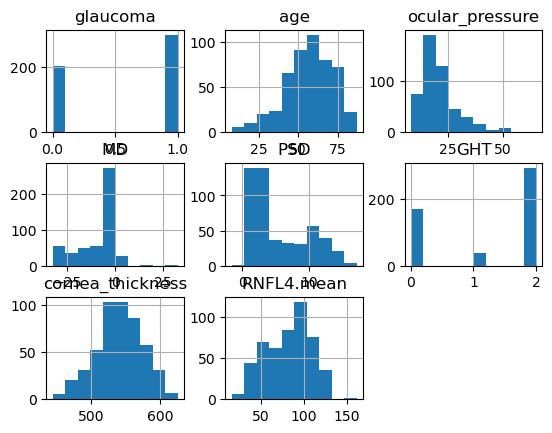

In [3]:
df.hist()

In [4]:
df.describe()

,glaucoma,age,ocular_pressure,MD,PSD,GHT,cornea_thickness,RNFL4.mean
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.595190,56.845691,20.963928,-8.661383,5.512084,1.248497,540.308617,82.551770
std,0.491348,15.408306,8.546982,10.296883,4.262622,0.930503,33.594752,25.779878
min,0.000000,8.000000,8.000000,-32.510000,-1.590000,0.000000,445.000000,16.000000
25%,0.000000,47.000000,15.000000,-14.725000,2.075000,0.000000,519.000000,62.333333
50%,1.000000,57.000000,18.000000,-4.020000,3.240000,2.000000,542.000000,86.666667
75%,1.000000,67.000000,25.000000,-1.740000,9.355000,2.000000,563.500000,102.000000
max,1.000000,87.000000,65.000000,32.690000,17.120000,2.000000,625.000000,162.000000


In [5]:
df.head()

,RL,glaucoma,age,ocular_pressure,MD,PSD,GHT,cornea_thickness,RNFL4.mean
0,OD,0,62,17,-0.54,1.81,0,558,103.333333
1,OS,0,62,17,-0.64,1.38,0,564,107.666667
2,OD,0,66,12,-1.65,2.89,2,490,162.000000
3,OS,0,66,12,-1.14,3.88,2,495,99.000000
4,OD,1,53,24,-2.90,3.78,2,547,74.666667


In [6]:
def clean_df(df):
    df = df.drop(['RL'], axis=1)
    return df
# df = numpy.where(df['col_770'] == '22728486', 0, 1)
df = clean_df(df)
df

,glaucoma,age,ocular_pressure,MD,PSD,GHT,cornea_thickness,RNFL4.mean
0,0,62,17,-0.54,1.81,0,558,103.333333
1,0,62,17,-0.64,1.38,0,564,107.666667
2,0,66,12,-1.65,2.89,2,490,162.000000
3,0,66,12,-1.14,3.88,2,495,99.000000
4,1,53,24,-2.90,3.78,2,547,74.666667
...,...,...,...,...,...,...,...,...
494,0,13,15,-2.44,2.49,0,531,109.666667
495,0,55,15,-1.21,2.17,0,562,109.333333
496,0,55,16,-0.84,1.86,0,566,110.333333
497,0,55,18,-0.43,1.91,0,545,120.666667


In [7]:
def normalize(dataset):
    return tf.keras.utils.normalize(dataset)

In [8]:
def scale_dataset(data):
    y = numpy.array(data[data.columns[0]].values)
    X = numpy.array(data.drop(data.columns[0], axis=1).values)
    data = numpy.array(numpy.hstack((X, numpy.reshape(y, (-1, 1)))))
    
    return data.astype(float), X.astype(float), y.astype(float)


In [9]:
train, valid, test = numpy.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

d:\progdata\anaconda\envs\ml\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
train_data, X_train, y_train = scale_dataset(train)
valid_data, X_valid, y_valid = scale_dataset(valid)
test_data, X_test, y_test = scale_dataset(test)

In [11]:
X_train = normalize(X_train)
X_test = normalize(X_test)
X_valid = normalize(X_valid)

X_train

array([[ 0.10922218,  0.06182388, -0.02161775, ...,  0.00412159,
         0.98299966,  0.13051708],
       [ 0.13156549,  0.02133494, -0.01497002, ...,  0.00177791,
         0.97251786,  0.19023658],
       [ 0.08324163,  0.04162081, -0.03702361, ...,  0.00378371,
         0.99133213,  0.08071916],
       ...,
       [ 0.14428738,  0.09619158, -0.02733765, ...,  0.00384766,
         0.97923033,  0.09939797],
       [ 0.11546572,  0.05959521, -0.03274012, ...,  0.0037247 ,
         0.98518332,  0.10429162],
       [ 0.03067208,  0.03428056, -0.00806495, ...,  0.00180424,
         0.98511495,  0.16538865]])

In [12]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [13]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(7,)),
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(4,)),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
  )
  return nn_model, history

In [14]:
model, history = train_model(X_train, y_train, 16, 0.2, 0.01, 64, 486)
plot_history
val_loss = model.evaluate(X_valid, y_valid)[0]

Epoch 1/486
4/4 [==============================] - 2s 128ms/step - loss: 0.6922 - accuracy: 0.5021 - val_loss: 0.6834 - val_accuracy: 0.5667
Epoch 2/486
4/4 [==============================] - 0s 17ms/step - loss: 0.6795 - accuracy: 0.5858 - val_loss: 0.6811 - val_accuracy: 0.5667
Epoch 3/486
4/4 [==============================] - 0s 17ms/step - loss: 0.6748 - accuracy: 0.5858 - val_loss: 0.6782 - val_accuracy: 0.5667
Epoch 4/486
4/4 [==============================] - 0s 17ms/step - loss: 0.6713 - accuracy: 0.5858 - val_loss: 0.6750 - val_accuracy: 0.5667
Epoch 5/486
4/4 [==============================] - 0s 11ms/step - loss: 0.6686 - accuracy: 0.5858 - val_loss: 0.6713 - val_accuracy: 0.5667
Epoch 6/486
4/4 [==============================] - 0s 16ms/step - loss: 0.6635 - accuracy: 0.5858 - val_loss: 0.6628 - val_accuracy: 0.5667
Epoch 7/486
4/4 [==============================] - 0s 17ms/step - loss: 0.6564 - accuracy: 0.5858 - val_loss: 0.6547 - val_accuracy: 0.5667
Epoch 8/486
4/4 [==

In [15]:
X_train[16]

array([ 0.14119531,  0.04894771, -0.00521481,  0.00551603,  0.        ,
        0.96954112,  0.19390822])

In [16]:
X_test[16]

array([ 0.09627648,  0.0665183 , -0.0312461 ,  0.01985046,  0.00350096,
        0.97676869,  0.17563165])

In [17]:
from sklearn.metrics import classification_report
y_train_predict = model.predict(X_test)

4/4 [==============================] - 0s 0s/step


In [18]:
y_binary = numpy.where(y_train_predict > 0.5, 1, 0)
report = classification_report(y_binary, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.94      0.97      0.96        68

    accuracy                           0.94       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100

